# Polynômes de chaos : application au cas de la poutre encastrée avec chaos par moindres carrés

## Résumé

Dans ce notebook, nous présentons la décomposition en chaos polynomial du cas de la poutre encastrée. Nous montrons comment calculer les coefficients par moindres carrés.

TODO : 
- Estimation par moindres carrés _"all-subsets"_.
- Estimation par moindres carrés régularisés _"ridge"_.
- Estimation par moindres carrés LARS.
- méthode _"stepwise_".

## References

- On the Markdown format : https://github.com/openturns/openturns/pull/2415
- On the use of the linear model for a polynomial chaos expansion : https://github.com/openturns/openturns/pull/2373

## Introduction

Considèrons un modèle physique $g : \mathbb{R}^p \rightarrow \mathbb{R}$ :
$$
Y = g(\boldsymbol{X})
$$
où $\boldsymbol{X} \in \mathcal{X} \subseteq \mathbb{R}^p$ est un vecteur aléatoire et $Y\in \mathbb{R}$ est une variable aléatoire. 
On considère la transformation $\boldsymbol{Z} = T(\boldsymbol{X})$, où $\boldsymbol{X} \in \mathbb{R}^p$ est le vecteur aléatoire en entrée du modèle physique, $T$ est la transformation iso-probabiliste et $\boldsymbol{Z} \in \mathcal{Z} \subseteq \mathbb{R}^p$ est la variable standardisée. 
On introduit la fonction $h$ définie par :
$$
h(\boldsymbol{Z}) = g\left(T^{-1}(\boldsymbol{Z})\right) = (g \circ T^{-1}) (\boldsymbol{Z})
$$
pour tout $\boldsymbol{Z}\in \mathcal{Z}$. 

La décomposition en polynômes du chaos est :
$$
\widetilde{h}(\boldsymbol{Z}) = \sum_{k = 0}^P a_k \Psi_k(\boldsymbol{Z})
$$
pour tout $\boldsymbol{Z}\in \mathcal{Z}$, où $P \in \mathbb{N}$ est le nombre de coefficients dans la décomposition, $a_k \in \mathbb{R}$ est le coefficient, $\psi_k$ est le polynôme multivarié et $\boldsymbol{Z}$ est la variable standardisée. 


### Calcul des coefficients par moindres carrés

Soit $n \in \mathbb{N}$ un entier représentant la taille de l'échantillon. Soit $\left\{\boldsymbol{x}^{(j)}\right\}_{j = 1, ..., n}$ un échantillon i.i.d. du vecteur aléatoire $\boldsymbol{X}$. Soit $\left\{y^{(j)} = g\left(\boldsymbol{x}^{(j)}\right)\right\}$ l'échantillon correspondant les valeurs du modèle physique. Soit $\boldsymbol{y} \in \mathbb{R}^n$ le vecteur des observations en sortie du modèle physique :
$$
\boldsymbol{y} = \left(y^{(1)}, ..., y^{(n)}\right) \in \mathbb{R}^n.
$$
Soit $\left\{\boldsymbol{z}^{(j)}\right\}$ l'échantillon des entrées observées standardisées :
$$
\boldsymbol{z}^{(j)} = T\left(\boldsymbol{x}^{(j)}\right)
$$
pour $j = 1, ..., n$
On considère la matrice de conception $D \in \mathbb{R}^{n(P + 1)}$ définie par :
$$
d_{jk} = \psi_k\left(\boldsymbol{z}^{(j)}\right)
$$
pour $j = 1, ..., n$ et $k = 1, ..., P + 1$.
Le vecteur des coefficients du chaos polynomial est :
$$
\boldsymbol{a} = (a_0, a_1, ..., a_P)\in \mathbb{R}^{P + 1}.
$$
Les prédictions du modèle sont :
$$
\widehat{\boldsymbol{y}} = D \boldsymbol{a}
$$
La méthode des moindres carrés consiste à rechercher la solution du problème :
$$
\widehat{\boldsymbol{a}} = \operatorname{argmin}_{\boldsymbol{a} \in \mathbb{R}^{P + 1}} \left\|\boldsymbol{y} - D \boldsymbol{a}\right\|_2
$$

In [1]:
from openturns.usecases import ishigami_function
import openturns as ot
import openturns.viewer as otv
from IPython.display import Markdown

In [2]:
ot.Log.Show(ot.Log.NONE)
ot.RandomGenerator.SetSeed(0)

In [3]:
im = ishigami_function.IshigamiModel()
sampleSize = 1000
inputTrainSample = im.distributionX.getSample(sampleSize)
outputTrainSample = im.model(inputTrainSample)

In [4]:
multivariateBasis = ot.OrthogonalProductPolynomialFactory([im.X1, im.X2, im.X3])
totalDegree = 7
enumerateFunction = multivariateBasis.getEnumerateFunction()
basisSize = enumerateFunction.getBasisSizeFromTotalDegree(totalDegree)
print("Basis size = ", basisSize)

Basis size =  120


In [5]:
standardizedDistribution = multivariateBasis.getMeasure()
transformation = ot.DistributionTransformation(
    im.distributionX, standardizedDistribution
)
standardInputTrainSample = transformation(inputTrainSample)
# Create the basis
basis = ot.Basis()
for i in range(basisSize):
    basisFunction = multivariateBasis.build(i)
    basis.add(basisFunction)

In [6]:
lma = ot.LinearModelAlgorithm(standardInputTrainSample, outputTrainSample, basis)
lma.run()
lmResult = lma.getResult()
metamodel = lmResult.getMetaModel()

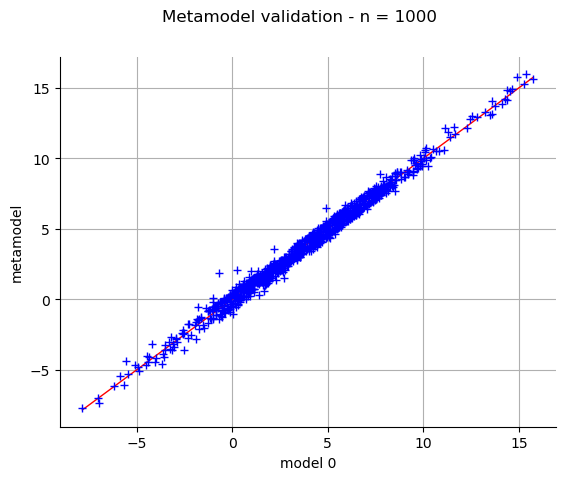

In [7]:
inputTestSample = im.distributionX.getSample(sampleSize)
outputTestSample = im.model(inputTestSample)
standardInputTestSample = transformation(inputTestSample)
val = ot.MetaModelValidation(standardInputTestSample, outputTestSample, metamodel)
graph = val.drawValidation()
view = otv.View(graph)

In [8]:
coefficients = lmResult.getCoefficients()
coefficients

class=Point name=Unnamed dimension=120 values=[3.51062,1.6168,0.0176172,-0.00302787,0.00207795,-0.00632285,0.000808137,-0.575118,0.0352787,0.0188915,-1.31464,0.0236058,-0.00358541,0.0121091,0.00412781,1.3579,-0.00391916,-0.000868648,-0.00134937,-0.00835446,-0.00513374,-0.000841675,0.017505,0.015543,0.0335448,0.0118313,-0.0107797,0.000916182,0.0166504,0.0227201,-1.9539,-0.000853578,0.0091154,0.0578784,0.00787351,0.162597,0.00377429,-0.011365,0.00641715,-0.0226232,-1.12106,-0.0049494,-0.0187318,-0.0128965,0.00594532,0.00176876,0.00241501,-0.0268536,0.00396697,0.406677,0.00882582,0.00283511,0.0139238,-0.0242617,-0.0235001,-0.00958338,0.00121437,-0.0126106,-0.00243564,-0.0222661,-0.0102368,-0.00959902,0.000389988,-0.000656011,0.0156613,0.0272002,0.0161706,0.0233023,0.000657748,0.027242,-0.006891,-0.00411827,-0.0211048,-0.0332507,0.0245842,0.00995604,-0.0124777,1.36435,0.00107642,-0.0132066,0.0110383,0.0352921,0.0427742,0.00775113,-0.0229653,-0.000389804,0.0147768,-0.0140306,-0.0256842,0.148513,-0.0121466,-0.00414044,0.0120034,0.00255439,0.014017,-0.0212681,-0.00450715,-0.0198321,-0.360981,0.0241106,-0.005351,-0.0168958,-0.0207719,0.0072049,0.01631,0.0201474,0.00220597,-0.0300504,0.00653448,0.0217985,0.0140277,0.0159272,0.00306564,0.00940128,0.00141036,-0.00959792,-0.0221092,-0.0234556,0.00145066,0.00744798]

In [9]:
markdown = ""
# Table
markdown += "| Index | Multi-Index | Coefficients |\n"
markdown += "|-------|-------------|--------------|\n"
for k in range(basisSize):
    multiIndex = enumerateFunction(k)
    markdown += f"| {k} | {multiIndex} | {coefficients[k]} |\n"
markdown += "\n"
Markdown(markdown)

| Index | Multi-Index | Coefficients |
|-------|-------------|--------------|
| 0 | [0,0,0] | 3.5106211450935403 |
| 1 | [1,0,0] | 1.6168007313493509 |
| 2 | [0,1,0] | 0.017617243079540542 |
| 3 | [0,0,1] | -0.0030278720935408795 |
| 4 | [2,0,0] | 0.002077945093332609 |
| 5 | [1,1,0] | -0.006322845124978622 |
| 6 | [1,0,1] | 0.0008081369296134358 |
| 7 | [0,2,0] | -0.5751181082046226 |
| 8 | [0,1,1] | 0.0352786571754576 |
| 9 | [0,0,2] | 0.018891533485543857 |
| 10 | [3,0,0] | -1.3146428011717164 |
| 11 | [2,1,0] | 0.023605779008638646 |
| 12 | [2,0,1] | -0.003585406694994322 |
| 13 | [1,2,0] | 0.012109118031163059 |
| 14 | [1,1,1] | 0.004127809407640326 |
| 15 | [1,0,2] | 1.3578985535887707 |
| 16 | [0,3,0] | -0.003919159870020082 |
| 17 | [0,2,1] | -0.000868648135731426 |
| 18 | [0,1,2] | -0.001349370861434941 |
| 19 | [0,0,3] | -0.008354464497386145 |
| 20 | [4,0,0] | -0.005133743649632557 |
| 21 | [3,1,0] | -0.0008416748249649807 |
| 22 | [3,0,1] | 0.017504964125372256 |
| 23 | [2,2,0] | 0.015543048661859299 |
| 24 | [2,1,1] | 0.033544804788881014 |
| 25 | [2,0,2] | 0.011831273008530234 |
| 26 | [1,3,0] | -0.010779700088820812 |
| 27 | [1,2,1] | 0.000916182259933712 |
| 28 | [1,1,2] | 0.0166503992328711 |
| 29 | [1,0,3] | 0.022720137492830028 |
| 30 | [0,4,0] | -1.9538954104056616 |
| 31 | [0,3,1] | -0.0008535778849974036 |
| 32 | [0,2,2] | 0.00911540133509753 |
| 33 | [0,1,3] | 0.05787840872883503 |
| 34 | [0,0,4] | 0.00787350821528781 |
| 35 | [5,0,0] | 0.16259737060384785 |
| 36 | [4,1,0] | 0.003774286156765628 |
| 37 | [4,0,1] | -0.01136501925945129 |
| 38 | [3,2,0] | 0.006417151308260152 |
| 39 | [3,1,1] | -0.022623194224342166 |
| 40 | [3,0,2] | -1.1210610776391663 |
| 41 | [2,3,0] | -0.0049493960954906735 |
| 42 | [2,2,1] | -0.018731780389332237 |
| 43 | [2,1,2] | -0.01289653557943689 |
| 44 | [2,0,3] | 0.005945322004594878 |
| 45 | [1,4,0] | 0.0017687575007148632 |
| 46 | [1,3,1] | 0.002415006921615983 |
| 47 | [1,2,2] | -0.026853649959435698 |
| 48 | [1,1,3] | 0.003966970042790773 |
| 49 | [1,0,4] | 0.40667671002575645 |
| 50 | [0,5,0] | 0.008825816770774127 |
| 51 | [0,4,1] | 0.0028351117769658484 |
| 52 | [0,3,2] | 0.013923789302070598 |
| 53 | [0,2,3] | -0.024261736964022753 |
| 54 | [0,1,4] | -0.023500073062538034 |
| 55 | [0,0,5] | -0.009583381706473678 |
| 56 | [6,0,0] | 0.0012143747326358234 |
| 57 | [5,1,0] | -0.012610598047626535 |
| 58 | [5,0,1] | -0.002435638885246039 |
| 59 | [4,2,0] | -0.022266063382105978 |
| 60 | [4,1,1] | -0.010236830064272855 |
| 61 | [4,0,2] | -0.009599024437456095 |
| 62 | [3,3,0] | 0.0003899876514892937 |
| 63 | [3,2,1] | -0.0006560112621792196 |
| 64 | [3,1,2] | 0.015661259059017572 |
| 65 | [3,0,3] | 0.027200219124469828 |
| 66 | [2,4,0] | 0.01617059112961784 |
| 67 | [2,3,1] | 0.02330228805252547 |
| 68 | [2,2,2] | 0.0006577480026449926 |
| 69 | [2,1,3] | 0.027241955359039307 |
| 70 | [2,0,4] | -0.006890998292592408 |
| 71 | [1,5,0] | -0.0041182663788805725 |
| 72 | [1,4,1] | -0.02110478833180375 |
| 73 | [1,3,2] | -0.033250696475518926 |
| 74 | [1,2,3] | 0.02458417978615533 |
| 75 | [1,1,4] | 0.009956039223203681 |
| 76 | [1,0,5] | -0.012477690747396002 |
| 77 | [0,6,0] | 1.3643511543869253 |
| 78 | [0,5,1] | 0.0010764155653408339 |
| 79 | [0,4,2] | -0.013206564670654225 |
| 80 | [0,3,3] | 0.011038250140106239 |
| 81 | [0,2,4] | 0.035292132669769515 |
| 82 | [0,1,5] | 0.04277420119093813 |
| 83 | [0,0,6] | 0.0077511312761337926 |
| 84 | [7,0,0] | -0.022965347164057293 |
| 85 | [6,1,0] | -0.00038980448050365206 |
| 86 | [6,0,1] | 0.014776794400195147 |
| 87 | [5,2,0] | -0.014030595133373609 |
| 88 | [5,1,1] | -0.025684235498344362 |
| 89 | [5,0,2] | 0.1485125589290398 |
| 90 | [4,3,0] | -0.012146551897747368 |
| 91 | [4,2,1] | -0.0041404397921889985 |
| 92 | [4,1,2] | 0.012003376457101771 |
| 93 | [4,0,3] | 0.002554388595052051 |
| 94 | [3,4,0] | 0.014016951878116376 |
| 95 | [3,3,1] | -0.02126807518713237 |
| 96 | [3,2,2] | -0.004507146448153727 |
| 97 | [3,1,3] | -0.01983213789147672 |
| 98 | [3,0,4] | -0.3609811645887883 |
| 99 | [2,5,0] | 0.024110586456566708 |
| 100 | [2,4,1] | -0.0053509975078519356 |
| 101 | [2,3,2] | -0.016895766971233968 |
| 102 | [2,2,3] | -0.020771882700934222 |
| 103 | [2,1,4] | 0.007204903509997129 |
| 104 | [2,0,5] | 0.016309978965235356 |
| 105 | [1,6,0] | 0.020147391577222055 |
| 106 | [1,5,1] | 0.002205968427651819 |
| 107 | [1,4,2] | -0.030050443874645703 |
| 108 | [1,3,3] | 0.0065344771051132 |
| 109 | [1,2,4] | 0.02179854002209009 |
| 110 | [1,1,5] | 0.01402766364303868 |
| 111 | [1,0,6] | 0.015927239320096313 |
| 112 | [0,7,0] | 0.003065640153953793 |
| 113 | [0,6,1] | 0.009401284454480196 |
| 114 | [0,5,2] | 0.0014103605107534305 |
| 115 | [0,4,3] | -0.009597918052438375 |
| 116 | [0,3,4] | -0.022109199910544542 |
| 117 | [0,2,5] | -0.023455623261017407 |
| 118 | [0,1,6] | 0.0014506636813227606 |
| 119 | [0,0,7] | 0.007447980205134712 |



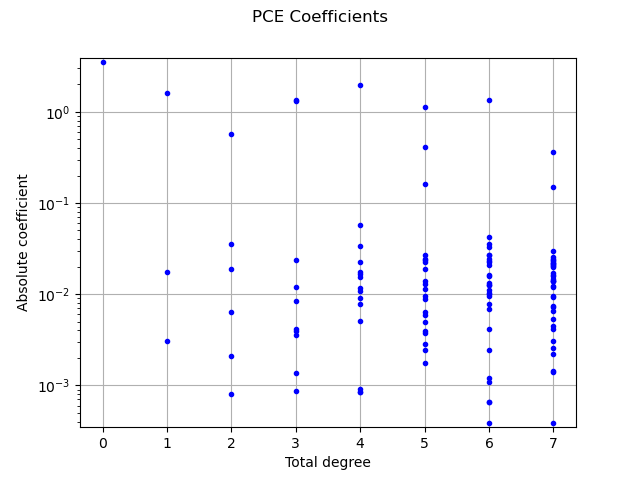

In [10]:
data = ot.Sample(0, 2)
for k in range(basisSize):
    multiIndex = enumerateFunction(k)
    totalDegree = sum(multiIndex)
    data.add([totalDegree, abs(coefficients[k])])
graph = ot.Graph("PCE Coefficients", "Total degree", "Absolute coefficient", True)
cloud = ot.Cloud(data)
cloud.setPointStyle("bullet")
graph.add(cloud)
graph.setLogScale(ot.GraphImplementation.LOGY)
graph.setIntegerXTick(True)
graph

## Exercice 1 : Application à la poutre encastrée

_Questions_
- Changer le modèle et considérer le modèle de poutre encastrée.
- Pour un degré total donné, utiliser la méthode de validation simple et estimer le score $Q^2$. Représenter le $Q^2$ en fonction du degré : qu'observez-vous ?